This notebook computes the walking times between pairs of voting locations. While this notebook specifically does Los Angeles County, one can similarly do any other region by replacing certain values (marked with !! comments) with desired ones. 

In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import MultiPoint
import networkx as nx

In [2]:
import osmnx as ox

Example: Los Angeles County

load data

In [7]:
#loading street network
place = 'Dallas County' #!! replace with desired city here
#G = ox.graph_from_place(place,network_type='walk', buffer_dist = 5000, simplify=False)
G = ox.graph_from_place(place,network_type='walk', simplify=False)

In [3]:
groc_sites = gpd.read_file('Dallas/Food access_updated/geo_export_872fcb6c-fbde-4264-ae77-8858a604ed0e.shp' )

<Axes: >

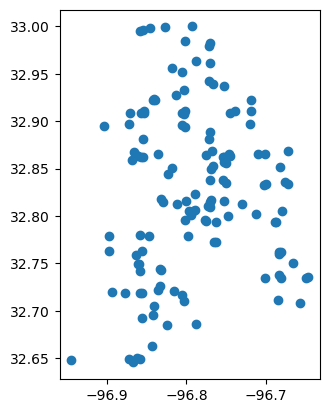

In [6]:
groc_sites.plot()

In [16]:
groc_sites['geometry'].x

0     -96.788114
1     -96.709663
2     -96.797124
3     -96.750431
4     -96.699660
         ...    
133   -96.800587
134   -96.840205
135   -96.841421
136   -96.729975
137   -96.798062
Length: 138, dtype: float64

In [17]:
#import pandas as pd
#loading polling-site location
#polls = pd.read_json('Los Angeles/lac_NoCatalina_polls.geojson') #!! specify the path/directory of polls dataset


#nodes=ox.distance.nearest_nodes(G,polls.longitude,polls.latitude)
nodes=ox.distance.nearest_nodes(G,groc_sites['geometry'].x,groc_sites['geometry'].y)

In [19]:
walk=np.full((len(groc_sites),len(groc_sites)),0)

multiprocess to speed up computation

In [20]:
#get pairs to prepare for multiprocess
pairs_list = []
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        pairs_list.append((i,j))

In [21]:
#define function needed for mp
def walk_dist_compute(pair):
    return nx.shortest_path_length(G,nodes[pair[0]],nodes[pair[1]],weight='length')/1.42

In [30]:
if False:
    import multiprocess as mp

    pool = mp.Pool(60)
    distances_list = pool.map(walk_dist_compute, pairs_list)
    pool.close()
else:
    mylist = []
    for p1,p2 in pairs_list:
        print(p1,p2)
        mylist.append(nx.shortest_path_length(G,nodes[p1],nodes[p2],weight='length')/1.42)
        

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60

In [32]:
#reassembling matrix
for i in range(len(pairs_list)):
    walk[pairs_list[i][0],pairs_list[i][1]]=mylist[i]
    walk[pairs_list[i][1],pairs_list[i][0]]=mylist[i]

In [33]:
np.save('dal_groc_walk.npy',walk) #name file as desired

In [34]:
walk

array([[    0, 11061, 13259, ...,  6273, 14620, 15589],
       [11061,     0,  8582, ..., 12037,  5650, 10031],
       [13259,  8582,     0, ..., 11038,  5237,  2440],
       ...,
       [ 6273, 12037, 11038, ...,     0, 14408, 13172],
       [14620,  5650,  5237, ..., 14408,     0,  5884],
       [15589, 10031,  2440, ..., 13172,  5884,     0]], shape=(138, 138))